In [0]:
!pip3 install --upgrade keras==2.1.3

Requirement already up-to-date: keras==2.1.3 in /usr/local/lib/python3.6/dist-packages (2.1.3)


# Building a Simple Convolutional Neural Network with Keras

In this exercise you will train a model to classify images of Thai prime ministers.

![alt text](https://mpics.mgronline.com/pics/Images/561000000534801.JPEG)

## Do you recognize this person?  If you do, now it's your turn to teach this computer to do the same. If you don't recognize him...now it's time to learn about him and teach this computer to do the same.
![Do you recognize this person?  If you do, now it's your turn to teach this computer to do the same.](https://www.posttoday.com/media/content/2018/09/13/798B88F9CD09453C96A7F802BEF83668.jpg)





## Time to build a neural network!
First let's import some prerequisites

In [0]:
!wget https://github.com/9teerapong/python-datasets/raw/master/data/deepdataset.zip
!unzip deepdataset.zip
!wget https://github.com/9teerapong/python-datasets/raw/master/data/input_data.py
!wget https://github.com/9teerapong/python-datasets/raw/master/data/mnistRead.py
!ls -al


Redirecting output to ‘wget-log.7’.
Archive:  deepdataset.zip
replace deepdataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

Redirecting output to ‘wget-log.8’.

Redirecting output to ‘wget-log.9’.
total 118892
drwxr-xr-x 1 root root     4096 Oct  3 04:07 .
drwxr-xr-x 1 root root     4096 Oct  3 03:48 ..
drwxr-xr-x 4 root root     4096 Sep 28 23:11 .config
drwxr-xr-x 4 root root     4096 Jun 13 00:19 deepdataset
-rw-r--r-- 1 root root 30395076 Oct  3 03:55 deepdataset.zip
-rw-r--r-- 1 root root 30395076 Oct  3 03:55 deepdataset.zip.1
-rw-r--r-- 1 root root 30395076 Oct  3 04:04 deepdataset.zip.2
-rw-r--r-- 1 root root 30395076 Oct  3 04:06 deepdataset.zip.3
-rw-r--r-- 1 root root     1064 Oct  3 03:55 input_data.py
-rw-r--r-- 1 root root     1064 Oct  3 04:04 input_data.py.1
-rw-r--r-- 1 root root     1064 Oct  3 04:07 input_data.py.2
drwxrwxr-x 3 root root     4096 Jun 13 07:13 __MACOSX
-rw-r--r-- 1 root root     9468 Oct  3 03:55 mnistRead.py
-rw-r--r-- 1 root root     9468

In [0]:
from __future__ import division, print_function, absolute_import
import input_data

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
%matplotlib inline

Using TensorFlow backend.


## Load training data

Importing the Prime data
Instructions for updating:
Please write your own downloading logic.
Extracting deepdataset/prime/train_prime_images.gz
Extracting deepdataset/prime/train_prime_labels.gz
Extracting deepdataset/prime/test_prime_images.gz
Extracting deepdataset/prime/test_prime_labels.gz


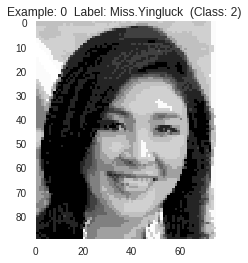

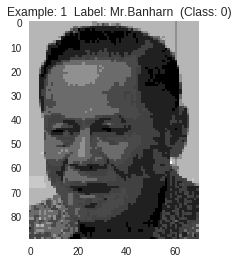

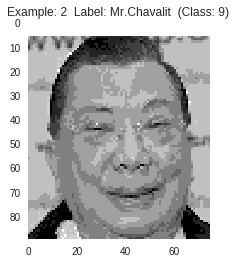

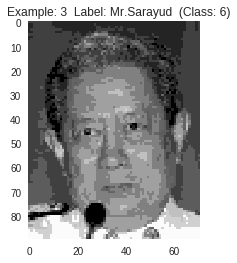

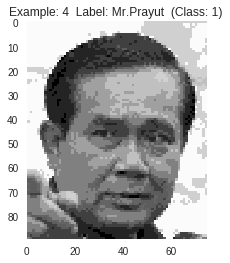

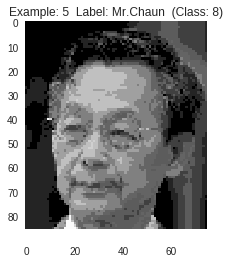

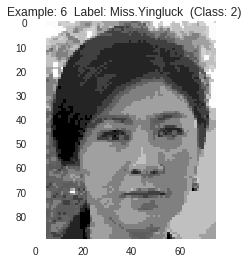

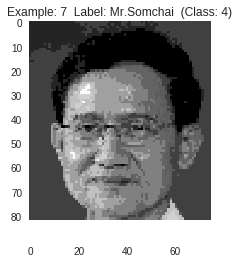

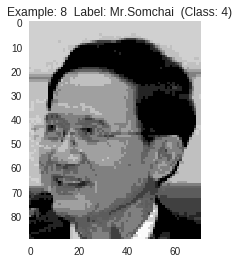

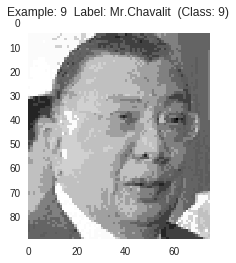

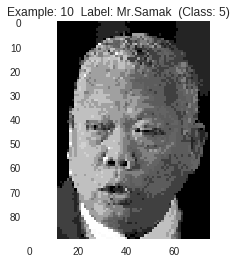

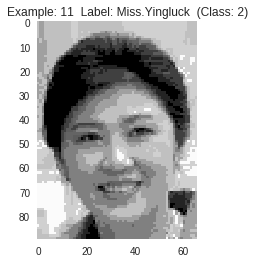

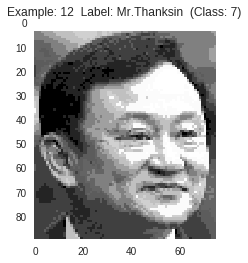

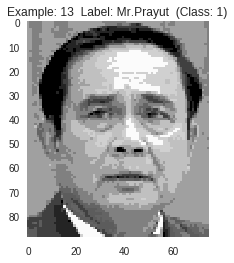

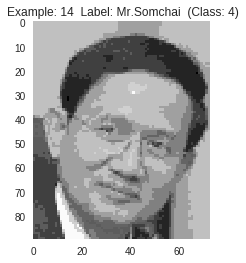

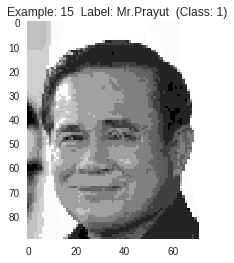

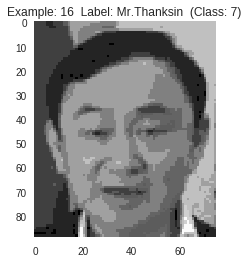

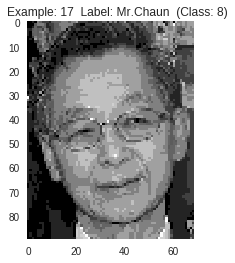

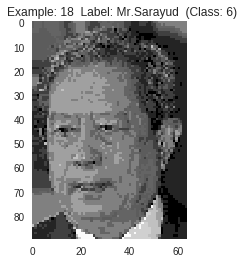

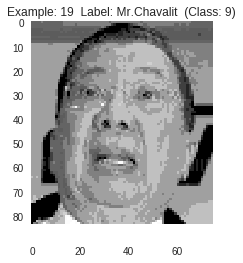

Extracting deepdataset/prime/train_prime_images.gz
Extracting deepdataset/prime/train_prime_labels.gz
Extracting deepdataset/prime/test_prime_images.gz
Extracting deepdataset/prime/test_prime_labels.gz


In [0]:
# read in the data and start an interactive session
print("Importing the Prime data")
input = input_data.read_data_sets("deepdataset/prime/", one_hot=True)

#check data
# get the prime ministers data and reshape the array into a 90*75 image
for example in range(20):
    data = input.train.images[example:example+1,:]
    label = input.train.labels[example:example+1,:]
    image = data[0].reshape([90,75])
    
    if label[0].argmax(axis=0) == 0:
        name = "Mr.Banharn"
    if label[0].argmax(axis=0) == 1:
        name = "Mr.Prayut"
    if label[0].argmax(axis=0) == 2:
        name = "Miss.Yingluck"
    if label[0].argmax(axis=0) == 3:
        name = "Mr.Abhisit"
    if label[0].argmax(axis=0) == 4:
        name = "Mr.Somchai"
    if label[0].argmax(axis=0) == 5:
        name = "Mr.Samak"
    if label[0].argmax(axis=0) == 6:
        name = "Mr.Sarayud"
    if label[0].argmax(axis=0) == 7:
        name = "Mr.Thanksin"
    if label[0].argmax(axis=0) == 8:
        name = "Mr.Chaun"
    if label[0].argmax(axis=0) == 9:
        name = "Mr.Chavalit"
    # plot the image, label of the image
    plt.imshow(image, cmap='gray') #cmap=plt.get_cmap('Paired'))
    plt.title('Example: %d  Label: %s  (Class: %d)' % (example, name, label[0].argmax(axis=0)))
    plt.grid(False)
    plt.show()

input = input_data.read_data_sets("deepdataset/prime/", one_hot=False)

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 90x75 image becomes a single 6750 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [0]:
X_train = input.train.images.reshape(input.train.images.shape[0], 90, 75,1)
X_test = input.test.images.reshape(input.test.images.shape[0], 90, 75,1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (2800, 90, 75, 1)
Testing matrix shape (1500, 90, 75, 1)
Training matrix shape (2800, 90, 75, 1)
Testing matrix shape (1500, 90, 75, 1)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [0]:
number_of_classes = 10

Y_train = np_utils.to_categorical(input.train.labels, number_of_classes)
Y_test = np_utils.to_categorical(input.test.labels, number_of_classes)

input.train.labels[0], input.test.labels[0]

(2, 3)

# Build the neural network
Build a convolutional neural-network (CNN) model.

The following example is one of the first CNN models (LENET-5 by Yann LeCun).  For our task, we'll do a modified version of LENET-5 fully connected network.

Note that: subsampling = average pooling

![alt text](https://image.slidesharecdn.com/lenettoresnet-170509055515/95/lenet-to-resnet-3-638.jpg?cb=1494309688)

In [0]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, 6, input_shape=(90,75,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)


model.add(Flatten())
# Fully connected layer
model.add(Dense(128))
BatchNormalization()
model.add(Dropout(0.5))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 85, 70, 32)        1184      
_________________________________________________________________
activation_1 (Activation)    (None, 85, 70, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 33, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 40, 33, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20480)             0         
__________

## Compile the model
Keras is built on top of TensorFlow which allows you to define a *computation graph* in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [0]:
#setseed to produce same result
from numpy.random import seed
seed(4)
from tensorflow import set_random_seed
set_random_seed(20)

model.fit(X_train, Y_train,
          batch_size=256, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 2800 samples, validate on 1500 samples
Epoch 1/20
2800/2800 [==============================] - 4s 1ms/step - loss: 2.3021 - acc: 0.1104 - val_loss: 2.2988 - val_acc: 0.2667
Epoch 2/20
2800/2800 [==============================] - 1s 422us/step - loss: 2.2701 - acc: 0.2389 - val_loss: 2.2696 - val_acc: 0.1667
Epoch 3/20
2800/2800 [==============================] - 1s 426us/step - loss: 2.1083 - acc: 0.3546 - val_loss: 2.1689 - val_acc: 0.2333
Epoch 4/20
2800/2800 [==============================] - 1s 425us/step - loss: 1.7091 - acc: 0.5089 - val_loss: 2.0496 - val_acc: 0.2000
Epoch 5/20
2800/2800 [==============================] - 1s 423us/step - loss: 1.2515 - acc: 0.6307 - val_loss: 2.0636 - val_acc: 0.3333
Epoch 6/20
2800/2800 [==============================] - 1s 427us/step - loss: 0.8642 - acc: 0.7507 - val_loss: 2.1165 - val_acc: 0.3667
Epoch 7/20
2800/2800 [==============================] - 1s 423us/step - loss: 0.5696 - acc: 0.8457 - val_loss: 2.1047 - val_acc: 0.4333
Ep

## Finally, evaluate its performance
![alt text](https://theneuralperspective.files.wordpress.com/2016/10/screen-shot-2016-11-06-at-8-13-41-pm.png?w=620)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss score:', score[0])
print('Test accuracy:', score[1])

Test loss score: 3.434108544031779
Test accuracy: 0.3999999998410543


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

[2 8 1 ... 9 0 3]


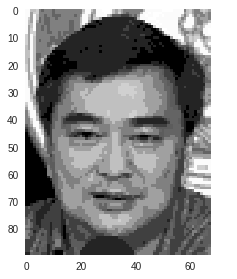

Model prediction: This is Miss.Yingluck , ( Class 2 )


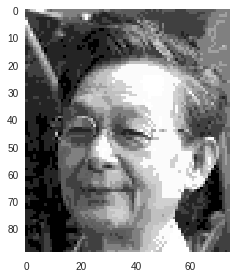

Model prediction: This is Mr.Chaun , ( Class 8 )


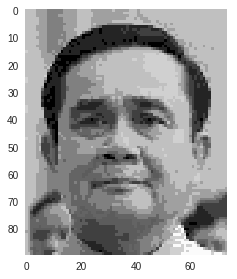

Model prediction: This is Mr.Prayut , ( Class 1 )


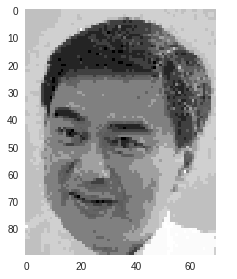

Model prediction: This is Mr.Somchai , ( Class 4 )


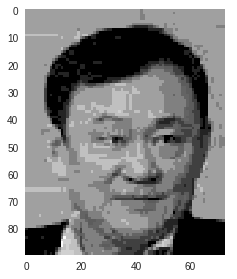

Model prediction: This is Miss.Yingluck , ( Class 2 )


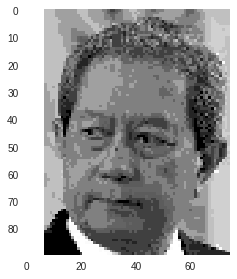

Model prediction: This is Mr.Chavalit , ( Class 9 )


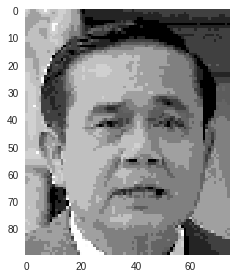

Model prediction: This is Mr.Chaun , ( Class 8 )


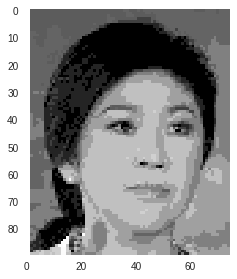

Model prediction: This is Miss.Yingluck , ( Class 2 )


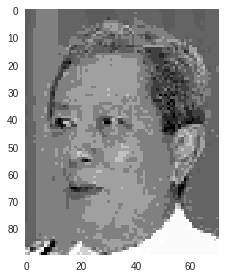

Model prediction: This is Mr.Sarayud , ( Class 6 )


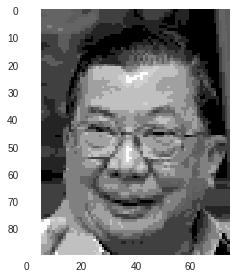

Model prediction: This is Mr.Chaun , ( Class 8 )


In [0]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)
print(predicted_classes)

preds = list( model.predict_classes(X_test))

n_images = 10
%matplotlib inline

for i in range(n_images):
    plt.figure()
    plt.grid("off")
    plt.tight_layout()
    plt.imshow(X_test[i].reshape(90,75), cmap='gray', interpolation='none')
    plt.show()
    if preds[i] == 0:
        name = "Mr.Banharn"
    if preds[i] == 1:
        name = "Mr.Prayut"
    if preds[i] == 2:
        name = "Miss.Yingluck"
    if preds[i] == 3:
        name = "Mr.Abhisit"
    if preds[i] == 4:
        name = "Mr.Somchai"
    if preds[i] == 5:
        name = "Mr.Samak"
    if preds[i] == 6:
        name = "Mr.Sarayud"
    if preds[i] == 7:
        name = "Mr.Thanksin"
    if preds[i] == 8:
        name = "Mr.Chaun"
    if preds[i] == 9:
        name = "Mr.Chavalit"
    print("Model prediction: This is", name, ", ( Class", preds[i],")")

# Check which items we got right / wrong
#correct_indices = np.nonzero(predicted_classes == Y_test)[0]
#incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

# The End
